Scikit Learn

In [2]:
from sklearn import datasets

dataset_funcs= [f for f in dir(datasets) if f.startswith("load_") or f.startswith("fetch")]

print("Total number of dataset loaders:", len(dataset_funcs))
print("\nLIst of data loaders:\n")

for idx, name in enumerate(dataset_funcs, start= 1):
    print(f"{idx}. {name}")

Total number of dataset loaders: 23

LIst of data loaders:

1. fetch_20newsgroups
2. fetch_20newsgroups_vectorized
3. fetch_california_housing
4. fetch_covtype
5. fetch_file
6. fetch_kddcup99
7. fetch_lfw_pairs
8. fetch_lfw_people
9. fetch_olivetti_faces
10. fetch_openml
11. fetch_rcv1
12. fetch_species_distributions
13. load_breast_cancer
14. load_diabetes
15. load_digits
16. load_files
17. load_iris
18. load_linnerud
19. load_sample_image
20. load_sample_images
21. load_svmlight_file
22. load_svmlight_files
23. load_wine


In [3]:
from sklearn import datasets

dataset_name = "load_iris"

loader = getattr(datasets, dataset_name)
dataset = loader()

print(f"Loaded dataset: {dataset_name}")
print(f"Data shape: {dataset.data.shape if hasattr(dataset, 'data') else 'N/A'}")
print(f"Feature names: {dataset.feature_names if hasattr(dataset, 'feature_names') else 'N/A'}")
print(f"Target shape: {dataset.target.shape if hasattr(dataset, 'target') else 'N/A'}")


Loaded dataset: load_iris
Data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape: (150,)


In [4]:
from sklearn.utils import all_estimators

# Get all estimators
estimators = all_estimators()

print(f"Total number of estimators: {len(estimators)}\n")
print("List of available estimators:\n")

for idx, (name, _) in enumerate(estimators, start=1):
    print(f"{idx}. {name}")

Total number of estimators: 207

List of available estimators:

1. ARDRegression
2. AdaBoostClassifier
3. AdaBoostRegressor
4. AdditiveChi2Sampler
5. AffinityPropagation
6. AgglomerativeClustering
7. BaggingClassifier
8. BaggingRegressor
9. BayesianGaussianMixture
10. BayesianRidge
11. BernoulliNB
12. BernoulliRBM
13. Binarizer
14. Birch
15. BisectingKMeans
16. CCA
17. CalibratedClassifierCV
18. CategoricalNB
19. ClassifierChain
20. ColumnTransformer
21. ComplementNB
22. CountVectorizer
23. DBSCAN
24. DecisionTreeClassifier
25. DecisionTreeRegressor
26. DictVectorizer
27. DictionaryLearning
28. DummyClassifier
29. DummyRegressor
30. ElasticNet
31. ElasticNetCV
32. EllipticEnvelope
33. EmpiricalCovariance
34. ExtraTreeClassifier
35. ExtraTreeRegressor
36. ExtraTreesClassifier
37. ExtraTreesRegressor
38. FactorAnalysis
39. FastICA
40. FeatureAgglomeration
41. FeatureHasher
42. FeatureUnion
43. FixedThresholdClassifier
44. FrozenEstimator
45. FunctionTransformer
46. GammaRegressor
47. Gau

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris()

df = pd.DataFrame(data= iris.data,columns= iris.feature_names)
df['target']= iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(df.shape)
print(df.dtypes)
df['target'].value_counts()
print("missing values are:",df.isnull().sum())

(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object
missing values are: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


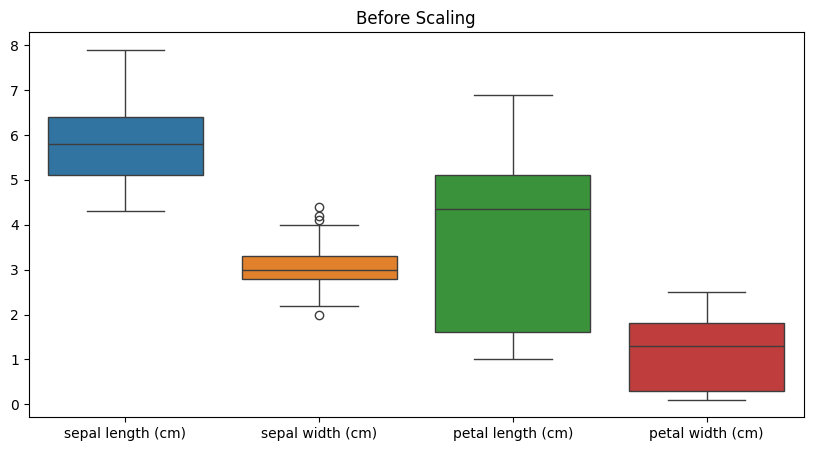

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df.iloc[:, :-1])
plt.title("Before Scaling")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Exclude target
y = df['target']

In [20]:
scaled_df = pd.DataFrame(x_scaled, columns=df.columns[:-1])

print("\nAfter Scaling:\n")
print(scaled_df.describe())


After Scaling:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


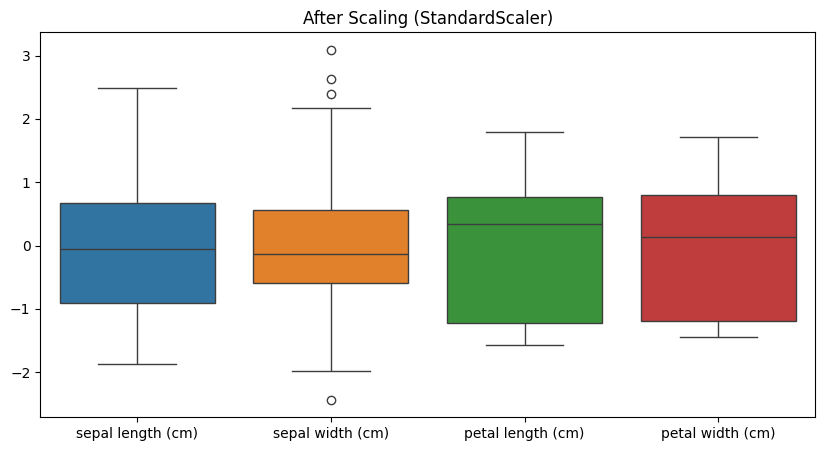

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=scaled_df)
plt.title("After Scaling (StandardScaler)")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2, random_state=42, stratify=y)

In [23]:
print("Train Features Shape:", x_train.shape)
print("Train Targets Shape:", y_train.shape)
print("Test Features Shape:", x_test.shape)
print("Test Targets Shape:", y_test.shape)

Train Features Shape: (120, 4)
Train Targets Shape: (120,)
Test Features Shape: (30, 4)
Test Targets Shape: (30,)


In [24]:
from sklearn.svm import SVC

svm_model= SVC(kernel='linear', C= 1.0, random_state=42)
svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


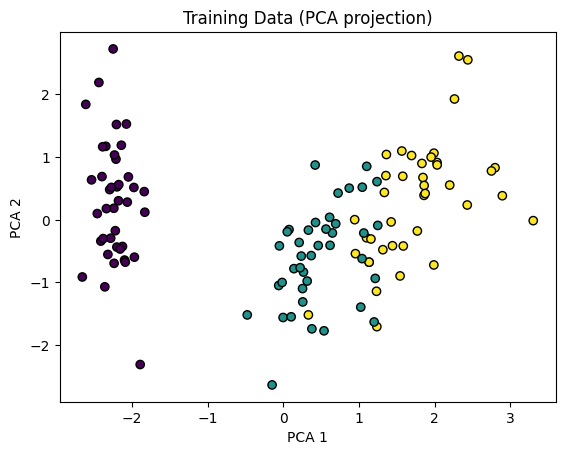

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("Training Data (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

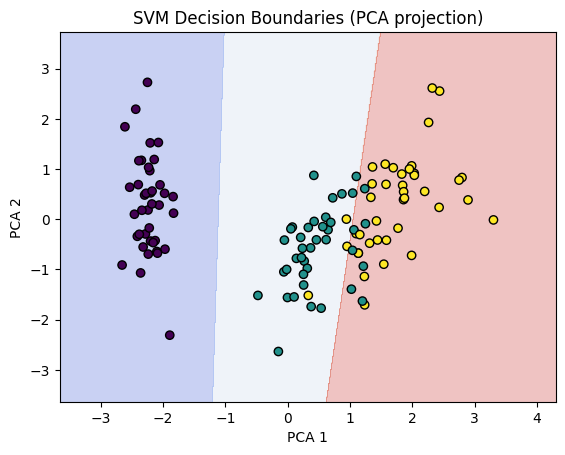

In [27]:
svm_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Create a mesh for decision boundary plot
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.title("SVM Decision Boundaries (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


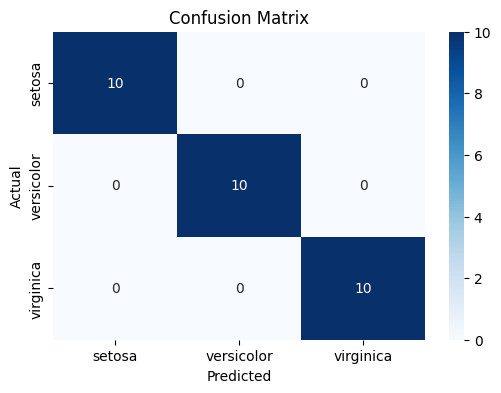

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = svm_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()